# ***Detecting presence of Heart Disease using classification***
#### Group Members: Ishan Kumar Singh, Tony Kashimori, Jeffrey Kim

### Introduction

Heart diseases, a global health concern, predominantly affect the elderly. With countless victims each year, early detection remains crucial. 

Our project investigates the likelihood of heart disease using key indicators: age, sex, resting blood pressure, cholesterol, and maximum heart rate.

The primary question is: **"Can age, sex, resting blood pressure, cholesterol, and maximum heart rate predict heart disease?"** 

The data set combines five heart datasets, offering the most extensive collection on heart disease prediction with 918 unique observations, focusing on key indicators to assess heart disease risk. Shedding light on these factors' roles, enhances our understanding of future preventive medical approaches.

### Preliminary exploratory data analysis

In [3]:
### Run this cell before continuing. 
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [4]:
data <- read_csv("https://raw.githubusercontent.com/jeffreyykim/DSCI-project-009-40-Group_Contract/94fda1d002bf5ab24d2be98a7c63061a1dad7ab0/heart.csv")

Rows: 918 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope
dbl (7): Age, RestingBP, Cholesterol, FastingBS, MaxHR, Oldpeak, HeartDisease

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
# cleaning and wrangling the data, renaming the values in a column
data <- data |>
        mutate(HeartDisease = as_factor(HeartDisease)) |>
        mutate(HeartDisease = fct_recode(HeartDisease, "Positive" = "1", "Negative" = "0"))
# selecting only the relevant columns
selected_data <- select(data, HeartDisease, Cholesterol,  Age, RestingBP, MaxHR, Sex) |>
                 filter(Cholesterol != 0, MaxHR !=0, RestingBP != 0)
# spliting data into testing and training sets
data_split <- initial_split(selected_data, prop = 0.75, strata = HeartDisease)
training_data <- training(data_split)
testing_data <- testing(data_split)
training_data
testing_data

HeartDisease,Cholesterol,Age,RestingBP,MaxHR,Sex
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Negative,283,37,130,98,M
Negative,195,54,150,122,M
Negative,339,39,120,170,M
⋮,⋮,⋮,⋮,⋮,⋮
Positive,193,68,144,141,M
Positive,131,57,130,115,M
Positive,236,57,130,174,F


HeartDisease,Cholesterol,Age,RestingBP,MaxHR,Sex
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Negative,289,40,140,172,M
Positive,214,48,138,108,F
Positive,207,37,140,130,M
⋮,⋮,⋮,⋮,⋮,⋮
Negative,342,55,132,166,F
Negative,157,41,120,182,M
Negative,175,38,138,173,M


In [6]:
# characteristics of the training data
training_data |>
group_by(HeartDisease, Sex) |>
summarize(Mean_Cholesterol = mean(Cholesterol, na.rm = TRUE), Mean_Age = mean(Age, na.rm = TRUE), Mean_RestingBP = mean(RestingBP, na.rn = TRUE),
          Mean_MaxHR = mean(MaxHR, na.rm = TRUE))

`summarise()` has grouped output by 'HeartDisease'. You can override using the
`.groups` argument.


HeartDisease,Sex,Mean_Cholesterol,Mean_Age,Mean_RestingBP,Mean_MaxHR
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Negative,F,247.3241,51.75926,130.0648,151.1574
Negative,M,236.1957,49.48370,131.6793,148.7935
Positive,F,273.7419,55.74194,143.8065,138.2903
Positive,M,249.7373,56.27542,136.1059,128.4407


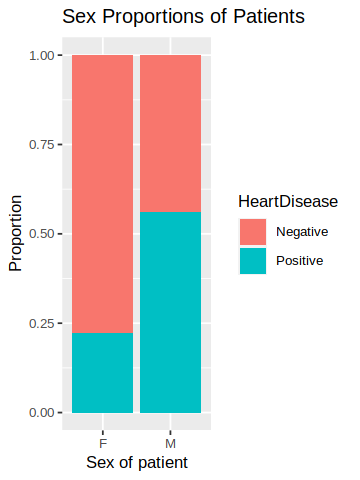

In [13]:
options(repr.plot.width = 3, repr.plot.height = 4)
sex_prop <- ggplot(training_data, aes(x = Sex, fill = HeartDisease)) + geom_bar(position = "fill") +
         labs(x = "Sex of patient", y = "Proportion", colour = "Heart Disease") + ggtitle("Sex Proportions of Patients") +
         theme(text = element_text(size=10))
sex_prop

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


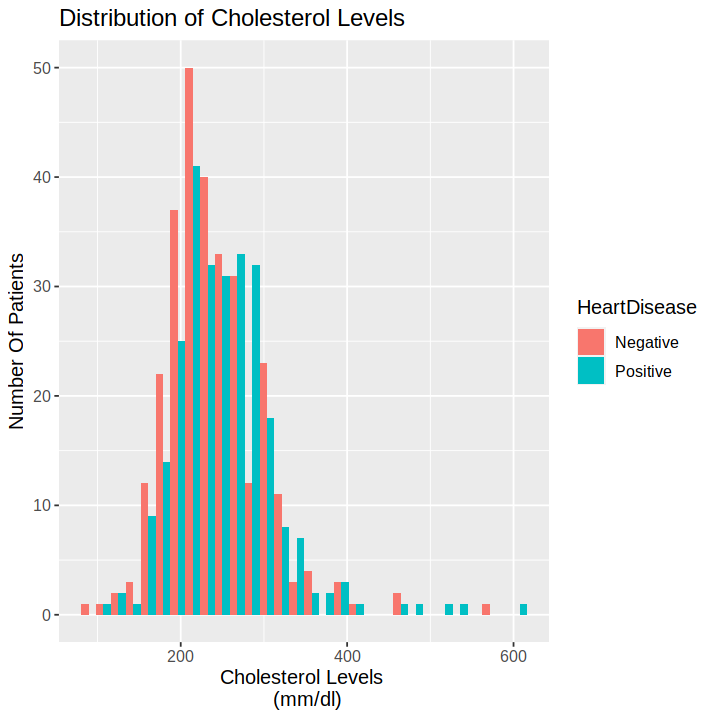

In [14]:
options(repr.plot.width = 6, repr.plot.height = 6)
cholesterol_dist <- ggplot(training_data, aes(x = Cholesterol, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Cholesterol Levels \n (mm/dl)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Cholesterol Levels") +
         theme(text = element_text(size=12)) 
cholesterol_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


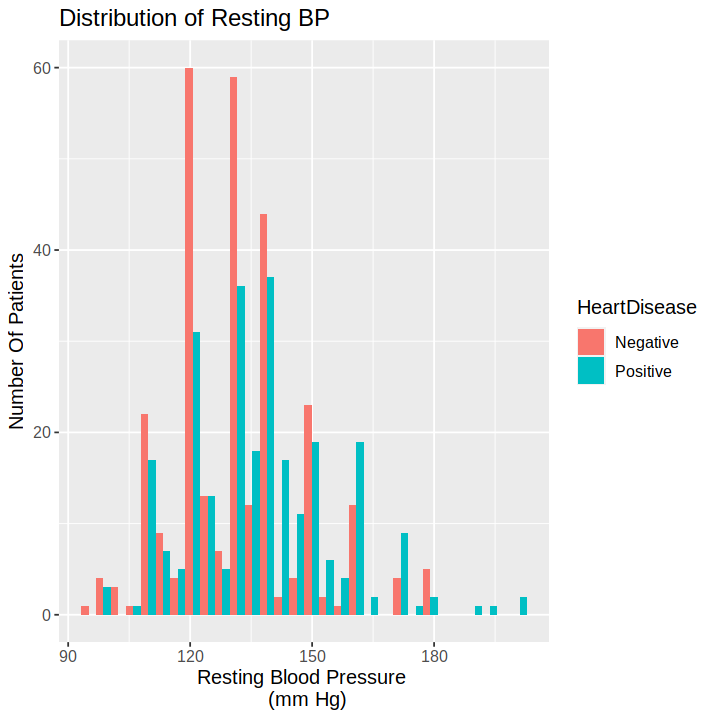

In [15]:
restbp_dist <- ggplot(training_data, aes(x = RestingBP, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Resting Blood Pressure \n (mm Hg)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Resting BP") +
         theme(text = element_text(size=12)) 
restbp_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


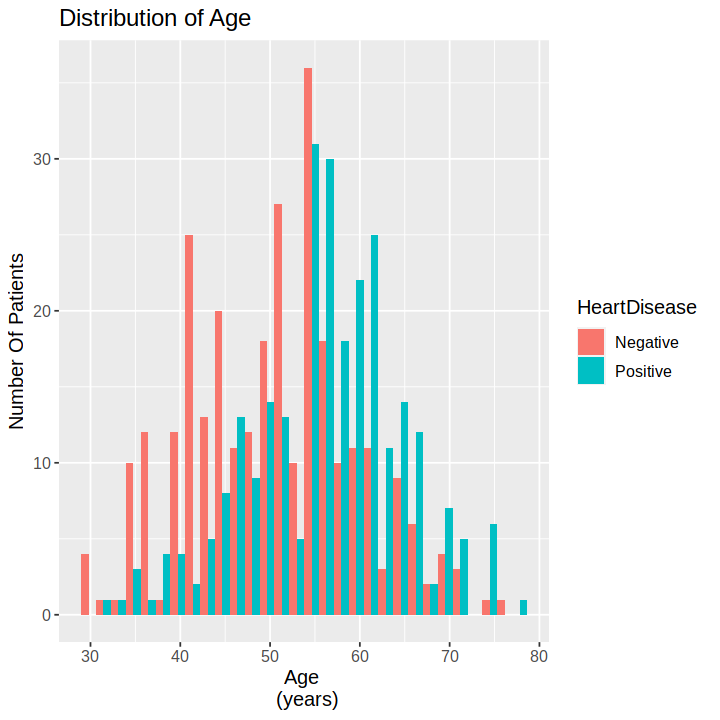

In [16]:
age_dist <- ggplot(training_data, aes(x = Age, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Age \n (years)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Age") +
         theme(text = element_text(size=12)) 
age_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


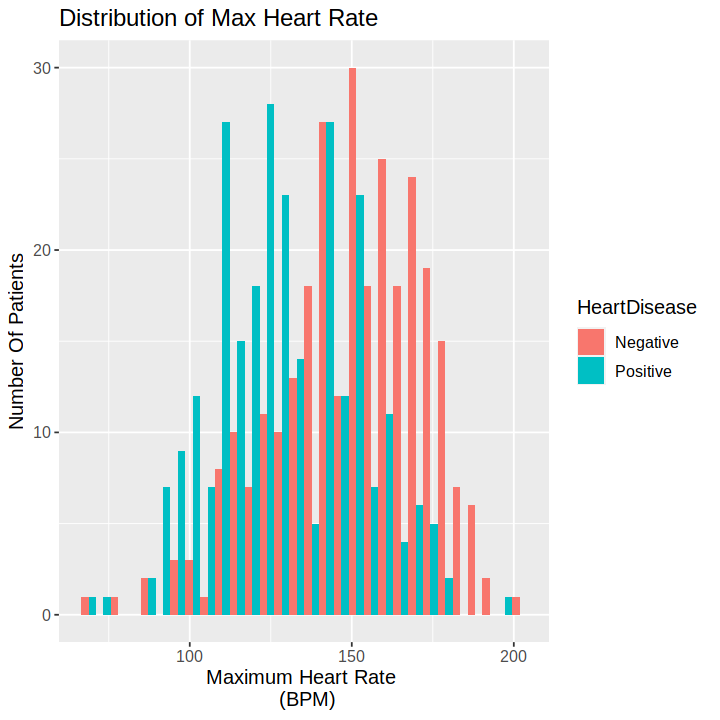

In [18]:
maxhr_dist <- ggplot(training_data, aes(x = MaxHR, fill = HeartDisease)) + geom_histogram(position = "dodge") + 
         labs(x = "Maximum Heart Rate \n (BPM)", y = "Number Of Patients", colour = "Heart Disease") + ggtitle("Distribution of Max Heart Rate") +
         theme(text = element_text(size=12)) 
maxhr_dist

### Methods:
**Variables used:**
- Age (years)
- Sex (Male[M] / Female[F])
- RestingBP (mm Hg)
- Cholesterol (mm/dl)
- MaxHR (BPM)
- HeartDisease

**Procedure**
1) Importing the libraries and data from Kaggle into R.
2) Cleaning, wrangling and renaming of data into R. Selecting only columns based on preliminary analysis of data.
3) Splitting into training and testing data. Scaling the data while making recipes.
4) Find best value of k to be used by cross validation of training data.
5) Using this k value to build our model and testing it onto the testing set.
6) Measuring the accuracy and analyzing the confusion matrix.

*Visualize: We will visualize the results of our model by plotting a scatter plot between the variables such as MaxHR and Age or Age and Cholesterol while coloring background of the plots based on the diagnosis of heart disease to check if our model is under/over fitting.*

### Expected outcomes and significance:

We expect to find a person with heart disease would generally have higher resting blood pressure, cholesterol levels, and age but lower maximum heart rates. Moreover, more males tend to have heart disease than females. 

With further work and updates to our model, it could be of great benefit in the medical industry as the model would help with early diagnosis and preventive measures for patients with various heart diseases. It could also help doctors to get a deeper understanding of factors influencing heart diseases and make more accurate diagnoses. 

*Future Questions:*
- *Why do more males suffer from heart disease than females?*

- *Which factor influences the tendency to develop heart disease the most?*

### Reference List
- fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

**For the data set:**
Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Creators:

    Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor:
David W. Aha (aha '@' ics.uci.edu) (714) 856-8779